# Exploración

Durante la fase de exploración, nos familiarizamos con los datos para tener conocimiento de como transformarlos para poder generar los modelos con mejor rendimiento posible.

## El conjunto de datos Herlev

Es un conjunto de datos cervicales creados por el Hospital Universitario de Herlev Suecia y la Universidad del Mar Egeo en Grecia <http://mde-lab.aegean.gr/index.php/downloads>. Fue compulado por J. Jantzen, G. Dounias, a los cuales se les agredece en demasía hacer público este conjunto de datos.

![](imagenes/herlev.jpg "Hospital de  Herlev")

Este conjunto sirve como *benchmark* para los algoritmos dedicados al diagnóstico del cáncer cervical y está presente en una enorme cantidad de artículos y trabajos en distintas áreas de la Inteligencia Artificial. Contiene tres elementos importantes:

1. Imágenes de células cervicales.
2. Máscaras de estas imágenes.
3. Una tabla de excel con las características de estas imágenes.

## Preparativos

Antes de iniciar con el proceso, debemos descargar y preparar los datos y los entornos de pruebas para correr los notebooks. Para esto nos auxiliaremos de google drive, que ya está integrado su uso con google colab. Solo se necesita montar el disco corriendo el siguiente código e iniciando sesión:


In [1]:
# Descomentar para usar en google colab
# from google.colab import drive
# drive.mount('/content/drive')

Una de las ventajas de google colab, es que nos deja correr comandos que se interpretan como si se usaran directamente en consola. Procedemos a usar el comando `git clone` para clonar el repositorio dentro de nuestro google drive. Posteriormente descargamos y extraemos el conjunto de datos citológicos. Finalmente, instalamos un módulo para poder leer archivos en formato `.xls`.

In [2]:
# !git clone https://github.com/marcodelmoral/curso_cisc_2022.git drive/MyDrive/curso_cisc_2022/
# !wget -P drive/MyDrive/curso_cisc_2022/Data http://mde-lab.aegean.gr/images/stories/docs/smear2005.zip
# !unzip drive/MyDrive/curso_cisc_2022/Data/smear2005.zip -d dr

In [3]:
# !pip install xlrd==1.2.0

In [4]:
%matplotlib inline

import pathlib
import pandas as pd
from PIL import Image


ROOT_DIR = pathlib.Path().resolve().parent

# Descomentar para correr en Google Colab usando Drive
# ROOT_DIR = pathlib.Path("drive/MyDrive/curso_cisc_2022")

DATA_DIR = ROOT_DIR / "Data" / "smear2005"
print(ROOT_DIR)

import utils

C:\Users\marco\Documents\Trabajo\Academia\curso_cisc_2022


## Pandas y sus características

Es un módulo de Python (<https://pandas.pydata.org/>) creado en 2008 por Wes McKinney para el procesamiento y análisis de datos. Está optimizado para el rendimiento, siendo implementado en lenguaje C.

Es una de las bibliotecas más utilizadas a nivel mundial <https://insights.stackoverflow.com/survey/2021#technology-most-popular-technologies>.

Algunas cosas que podemos hacer con pandas son:

- Cálculos y análisis estadístico.
- Limpieza de datos.
- Visualización.
- Lectura, agregación y almacenamiento de datos.
- Conexión a base de datos.

In [5]:
df = pd.read_excel(f'{DATA_DIR}/new_database_results.xls')

## Análisis de datos

### Vista previa de las columnas

El método `.head(n)` muestra las primeras n columnas del dataframe. Por defecto, si no se especifica n, este toma el valor de 5.

Podemnos observar las primeras 5 filas del dataframe.

In [6]:
df.head()

,ID,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,...,CytoElong,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class
0,153958345-153958392-001.BMP,803.500,27804.125,0.028087,85.866083,192.524631,29.832191,34.828150,0.856554,0.843403,...,0.750175,0.604273,101.375,673.500,0.230067,44,37,649,655,1
1,153960256-153960295-002.BMP,610.125,18067.875,0.032665,81.531353,153.439838,25.319871,30.805844,0.821918,0.818583,...,0.866065,0.589351,85.250,597.000,0.043701,36,26,502,504,1
2,157181281-157181308-001.BMP,990.375,79029.875,0.012377,77.843655,118.001177,33.552901,38.327536,0.875425,0.858397,...,0.815760,0.794843,111.750,1059.125,0.141150,53,37,2267,2500,1
3,157181387-157181418-001.BMP,554.500,98941.000,0.005573,70.054545,139.359845,23.799254,29.832868,0.797753,0.793271,...,0.770601,0.695414,81.000,1264.500,0.079801,38,29,2885,2960,1
4,157181525-157181540-001.BMP,636.375,99663.250,0.006345,76.950949,137.748293,25.946189,31.256999,0.830092,0.829332,...,1.215871,1.071126,87.875,1250.625,0.121304,36,24,2978,3159,1


### Visualización de columnas

El dataframe contiene 22 columnas, de las cuales, 20 corresponden a características de la célula, una define un identificador único para cada imagen y la restante representa la clase categórica de cada muestra.

In [7]:
print(len(df.columns))
df.columns

22


Index(['ID', 'Kerne_A', 'Cyto_A', 'K/C', 'Kerne_Ycol', 'Cyto_Ycol',
       'KerneShort', 'KerneLong', 'KerneElong', 'KerneRund', 'CytoShort',
       'CytoLong', 'CytoElong', 'CytoRund', 'KernePeri', 'CytoPeri',
       'KernePos', 'KerneMax', 'KerneMin', 'CytoMax', 'CytoMin', 'Class'],
      dtype='object')

### Descripción general del dataframe

Usando el método `.describe()` obtenemos una descripción estadística de cada una de las columnas.

In [8]:
df.describe()

,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,CytoShort,...,CytoElong,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,2990.826881,14053.904444,0.356610,90.490139,139.356935,52.497274,71.193455,0.750395,0.705578,118.130049,...,0.691923,0.381297,201.161396,490.032579,0.274383,107.895311,86.651036,416.865867,423.703381,4.577972
std,1878.177267,20357.674179,0.213364,21.780290,25.012857,18.754784,23.242059,0.156531,0.154648,71.904552,...,0.177367,0.172679,67.798197,274.857442,0.165056,57.507109,54.833614,633.817458,621.690605,1.816252
min,316.875000,467.875000,0.003990,17.913947,69.889702,13.973914,19.416488,0.307806,0.270610,29.457850,...,0.210975,0.066993,60.750000,136.125000,0.003364,19.000000,13.000000,14.000000,21.000000,1.000000
25%,1599.750000,2329.000000,0.218484,76.017591,123.257682,38.929320,55.713553,0.642667,0.598836,67.732383,...,0.567724,0.251712,154.250000,287.375000,0.149395,67.000000,49.000000,71.000000,85.000000,3.000000
50%,2592.250000,4891.250000,0.354828,89.201813,138.402393,50.404684,71.175839,0.762162,0.716932,93.126177,...,0.696390,0.350568,199.500000,388.125000,0.242546,96.000000,74.000000,140.000000,155.000000,5.000000
75%,3976.000000,14019.875000,0.504971,103.399375,151.040909,64.771793,86.353923,0.859482,0.813543,144.291619,...,0.807432,0.495136,243.375000,608.750000,0.364968,134.000000,109.000000,398.000000,421.000000,6.000000
max,10794.625000,127313.750000,0.885497,174.994651,230.486399,112.723053,158.823802,1.192308,1.135615,418.494540,...,1.215871,1.071126,411.375000,1718.000000,0.903233,430.000000,432.000000,3906.000000,4000.000000,7.000000


### Preparación de columnas objetivo

La columna "Class" contiene la clase en numero a la que pertenece cada imagen, para un mejor entendimiento, vamos a convertir esos numeros en clases categoricas. Una variable categórica es aquella que tiene un rango de valores específicos y limitados. Una variable categórica con dos valores es dicotómica o binaria, mientras que si puede tener múltiples valores se considera politómica.

Para ello vamos a crear tres diccionarios: el primero va a tomar los numeros del 0 al 6 que representan las 7 clases y los convertira a categoricos. Los categoricos salen de los nombres de la carpeta donde se encuentran las imagenes para el caso de 7 clases.

Para el caso de 2 clases, vamos a requerir los otros dos diccionarios: El primero convierte la clase categorica a 0 o 1 dependiendo si es anormal o anormal. El segundo nos va a convertir esos 0 y 1 en su clase categórica correspondiente.

Se crearán cuatro columnas extras, una combinación de clases en su versión categórica y numérica para las tareas de clasificación multiclase y binaria: `Class_cat_7, Class_num_7, Class_cat_2, Class_num_2`.

Las clases deben de comenzar en 0, pero en este caso comienzan en 1, por lo que restamos 1 a cada clase y creamos una nueva columna de clase numérica para el problema multiclase.

In [9]:
df['Class_num_7'] = df['Class'] - 1

Usando el método `.map(diccionario)` convertimos cualquier valor que exista en esa columna en los valores definidos en el diccionario de entrada. 

In [10]:

df['Class_cat_7'] = df['Class_num_7'].map(utils.map_7_classes)
df['Class_num_2'] = df['Class_cat_7'].map(utils.map_normal_anormal)
df['Class_cat_2'] = df['Class_num_2'].map(utils.map_2_classes)

Por último, podemos observar los nombres de las clases que contiene el dataframe, en su forma categórica multivariable.

In [11]:
df["Class_cat_7"].unique()

array(['normal_superficiel', 'normal_intermediate', 'normal_columnar',
       'light_dysplastic', 'moderate_dysplastic', 'severe_dysplastic',
       'carcinoma_in_situ'], dtype=object)

### Descripción del problema

Utilizar las características de cada muestra/imagen para poder clasificarla correctamente en su clase perteneciente. Existen dos formas de hacerlo:

1. Determinar si una célula es normal o anormal. Esto representa el problema ***binario***.
2. Determinar el tipo específico de la célula, es decir, determinar el grado de lesión que presenta. Esto representa el problema ***multiclase***.

### Análisis cuantitativo

Procedemos a agrupar los datos por su clase y luego contamos la cantidad de muestras que pertenecen a tal clase. Podemos observar que existe un desbalanceo en la cardinalidad de cada conjunto. Es importante tener en cuenta este problema.

In [12]:
df.groupby('Class_cat_7').size()

Class_cat_7
carcinoma_in_situ      150
light_dysplastic       182
moderate_dysplastic    146
normal_columnar         98
normal_intermediate     70
normal_superficiel      74
severe_dysplastic      197
dtype: int64

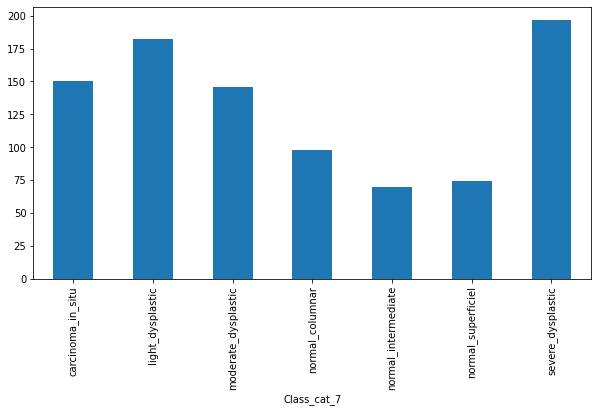

In [13]:
df.groupby('Class_cat_7').size().plot(kind='bar', figsize=(10,5));

El conjunto de datos tiene más células anormales que normales en total. Esto va incidir directamente en la forma de entrenar los próximos modelos.

In [14]:
df.groupby('Class_cat_2').size()

Class_cat_2
anormal    675
normal     242
dtype: int64

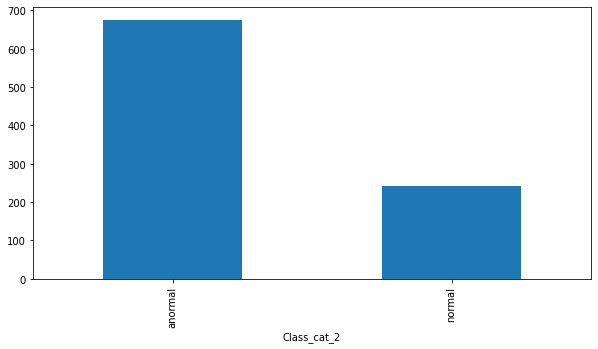

In [15]:
df.groupby('Class_cat_2').size().plot(kind='bar', figsize=(10,5));

### Muestreo y visualización de las imágenes

Para poder comprender bien el problema, debemos familiarizarnos con las características morfológicas de las células y como determinan la categoría y grado de lesión presentes en cada muestra individual.

Una de las primeras cosas que podemos observar es que los tamaños de las imágenes no son homogéneos. La calidad de la imagen también varía entre cada muestra, siendo algunas sumamente nítidas mientras que otras tienen una calidad inferior. También algunas imágenes no contienen exclusivamente una célula, algunas contienen múltiples y no conforme con ello, muchas de las muestras contienen otros artefactos como moco o sangre que hacen dificil su correcta clasificación.

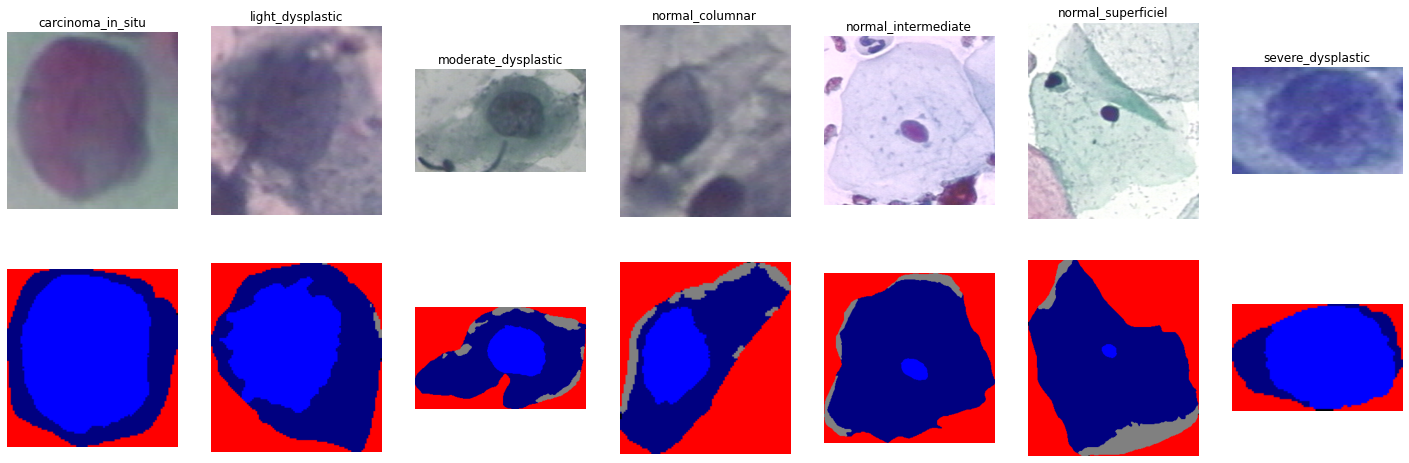

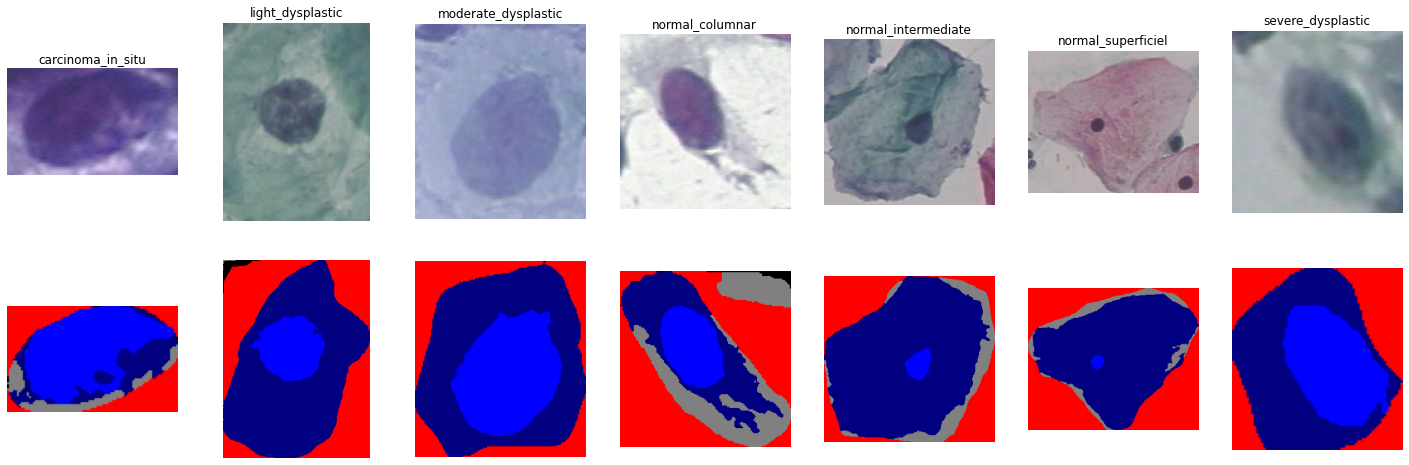

In [16]:
for ele in range(2):
    df_samples = df.groupby('Class_cat_7').apply(lambda x: x.sample(n=1))
    ims = []

    for file, y, in zip(df_samples['ID'], df_samples['Class_cat_7']):
        ruta = DATA_DIR / "New database pictures" / y / file
        img = Image.open(ruta)
        ims.append((img, y))

    for file, y, in zip(df_samples['ID'], df_samples['Class_cat_7']):
        ruta = DATA_DIR / "New database pictures" / y / file.replace(".BMP", "-d.bmp")
        mask = Image.open(ruta)
        ims.append((mask, y))

    utils.plot_figures(ims, nrows=2, ncols=7, figsize=(25, 8))

### Guardar datos

El último paso, es crear una columna `filename` que contendrá la ruta absoluta para cada muestra, esto para facilitar la alimentación de la fase de entrenamiento de los próximos modelos. 

Se guarda un archivo `.csv`, un tipo de archivo universal similar a excel, para ser usado en el entrenamiento.

In [17]:
df["filename"] = df.apply(lambda x: pathlib.Path(f"{DATA_DIR}/New database pictures/{x['Class_cat_7']}/{x['ID']}").absolute(), axis=1)

In [18]:
df.to_csv(f"{DATA_DIR}/dataset.csv", index=False)